In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)

In [ ]:
# For Simple linear regression
X = X[:, np.newaxis, 2]

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [4]:
X_train.shape

(353, 10)

In [26]:
from sklearn.linear_model import LinearRegression
lr_sk = LinearRegression()

In [27]:
lr_sk.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred_sk = lr_sk.predict(X_test)
print(y_pred_sk)

[154.1235067  204.81721599 124.92988001 106.09339576 258.53035681
 256.32953702 118.75258786 119.52147402 101.50717468 190.54137158
 141.70360267 172.51631204 174.34089304 134.81184017 294.13950798
  94.11403289 211.97052873 156.49984762 134.20709632 119.62534726
 148.88045343 165.00378118 151.09977307 176.03719872 133.27651748
 221.29531227 197.17482787  96.15923158  50.26531577 230.48342249
 242.06266394 114.1153262   67.0785352   94.53179042 201.21593262
 167.05306138 159.87838519 192.78601513 114.49291816 233.4825497
 140.82309666 121.06814332 192.27431013 191.13157307 179.1698153
 148.35140027 163.47610288 276.81203359 100.17813072 164.11265163
 255.81074398 136.94979051 152.37507828 107.92662528 194.21661635
  77.35015426 118.50951725  68.38527563 154.29094022 162.48905632
 168.36590928 156.8764705   97.13958436 238.17121803 145.46093854
 117.65678691 168.88768692 198.38893625 118.24408332 124.64831033
 223.17842907 200.62634508 129.54591274 158.1553552  154.33593871
 114.4710985

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print(f"MAE {mean_absolute_error(y_test,y_pred_sk)}")
print(f"MSE {mean_squared_error(y_test,y_pred_sk)}")

print(f"R2 {r2_score(y_test,y_pred_sk)}")

MAE 45.21292481299676
MSE 3094.4295991207023
R2 0.4399387660024645


In [32]:
print(f"{lr_sk.coef_} {lr_sk.intercept_}")

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836] 151.88334520854633


In [ ]:
class Simple_LR:
  def __inti__(self):
    self.m = None
    self.b = None
  def fit(self,X_train,y_train):
    num = 0
    den = 0
    for i in range(X_train.shape[0]):
      num = num + (X_train[i]-X_train.mean())*(y_train[i]-y_train.mean())
      den = den + (X_train[i]-X_train.mean())*(X_train[i]-X_train.mean())
    self.m = num/den
    self.b = y_train.mean() - (self.m * X_train.mean())
    print(self.m)
    print(self.b)


  def predict(self,X_test):
    return self.m * X_test + self.b
    

In [ ]:
lr = Simple_LR()
lr.fit(X_train,y_train)

[938.23786125]
[152.91886183]


In [ ]:
y_pred = lr.predict(X_test)
print(y_pred)

[[225.9732401 ]
 [115.74763374]
 [163.27610621]
 [114.73638965]
 [120.80385422]
 [158.21988574]
 [236.08568105]
 [121.81509832]
 [ 99.56772822]
 [123.83758651]
 [204.73711411]
 [ 96.53399594]
 [154.17490936]
 [130.91629517]
 [ 83.3878227 ]
 [171.36605897]
 [137.99500384]
 [137.99500384]
 [189.56845268]
 [ 84.3990668 ]]


In [16]:
class Multiple_LR:
  def __inti__(self):
    self.coef_ = None
    self.intercept_ = None
  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,0,1,axis=1)

    B = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
    print(B)
    self.intercept_ = B[0]
    self.coef_ = B[1:]
    
   


  def predict(self,X_test):
    return self.intercept_ + np.dot(X_test,self.coef_)
    

In [17]:
lrm = Multiple_LR()
lrm.fit(X_train,y_train)

[ 151.88334521   -9.16088483 -205.46225988  516.68462383  340.62734108
 -895.54360867  561.21453306  153.88478595  126.73431596  861.12139955
   52.41982836]


In [21]:
y_predm = lrm.predict(X_test)
print(y_predm)

[154.1235067  204.81721599 124.92988001 106.09339576 258.53035681
 256.32953702 118.75258786 119.52147402 101.50717468 190.54137158
 141.70360267 172.51631204 174.34089304 134.81184017 294.13950798
  94.11403289 211.97052873 156.49984762 134.20709632 119.62534726
 148.88045343 165.00378118 151.09977307 176.03719872 133.27651748
 221.29531227 197.17482787  96.15923158  50.26531577 230.48342249
 242.06266394 114.1153262   67.0785352   94.53179042 201.21593262
 167.05306138 159.87838519 192.78601513 114.49291816 233.4825497
 140.82309666 121.06814332 192.27431013 191.13157307 179.1698153
 148.35140027 163.47610288 276.81203359 100.17813072 164.11265163
 255.81074398 136.94979051 152.37507828 107.92662528 194.21661635
  77.35015426 118.50951725  68.38527563 154.29094022 162.48905632
 168.36590928 156.8764705   97.13958436 238.17121803 145.46093854
 117.65678691 168.88768692 198.38893625 118.24408332 124.64831033
 223.17842907 200.62634508 129.54591274 158.1553552  154.33593871
 114.4710985

In [22]:
r2_score(y_test,y_predm)

0.4399387660024645

In [33]:
print(f"{lrm.coef_} {lrm.intercept_}")

[  -9.16088483 -205.46225988  516.68462383  340.62734108 -895.54360867
  561.21453306  153.88478595  126.73431596  861.12139955   52.41982836] 151.88334520854627


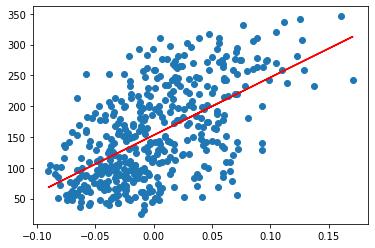

In [ ]:
plt.scatter(X,y)
plt.plot(X_train,lr_sk.predict(X_train),color='red')

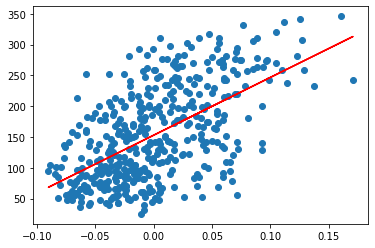

In [ ]:
plt.scatter(X,y)
plt.plot(X_train,lr.predict(X_train),color='red')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print(f"MAE {mean_absolute_error(y_test,y_pred)}")
print(f"MSE {mean_squared_error(y_test,y_pred)}")

print(f"R2 {r2_score(y_test,y_pred)}")

MAE 41.22709128976144
MSE 2548.0723987259694
R2 0.47257544798227147


In [ ]:
X_test.shape

(20, 1)

In [ ]:
#adjusted r2 score
r2 = r2_score(y_test,y_pred)

adj_r2 = 1-((1-r2)*(20-1)/(20-1-1))
print(adj_r2)

0.44327408398128654
